In [1]:
import pandas as pd
import numpy as np
from pathlib import Path  
import matplotlib.pyplot as plt

In [48]:
df_stock_price=pd.read_csv('./data/[ADJUSTED] SAP Dataset 2016-2021 - XETRA EUR.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df_EURO_exchange_rate=pd.read_csv('./data/[ADJUSTED] EURO x BRL 2016-2021.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [49]:
print(df_stock_price.shape)
print(df_EURO_exchange_rate.shape)

(1519, 6)
(1519, 6)


In [42]:
#Adjust dataset with same date index
missing_dates_df1 = pd.date_range(start = '2016-01-01', end = '2021-12-31' ).difference(df_stock_price.index)
missing_dates_df2 = pd.date_range(start = '2016-01-01', end = '2021-12-31' ).difference(df_EURO_exchange_rate.index)

dates_missing1 = set(missing_dates_df1) - set(missing_dates_df2)
dates_missing2 = set(missing_dates_df2) - set(missing_dates_df1)
len(dates_missing1)

44

In [43]:
len(dates_missing2)

3

In [44]:
df_EURO_exchange_rate = df_EURO_exchange_rate.drop(dates_missing1)
df_EURO_exchange_rate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1519 entries, 2016-01-04 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1519 non-null   float64
 1   High       1519 non-null   float64
 2   Low        1519 non-null   float64
 3   Close      1519 non-null   float64
 4   Adj Close  1519 non-null   float64
 5   Volume     1519 non-null   float64
dtypes: float64(6)
memory usage: 83.1 KB


In [45]:
df_stock_price = df_stock_price.drop(dates_missing2)
df_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1519 entries, 2016-01-04 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1519 non-null   float64
 1   High       1519 non-null   float64
 2   Low        1519 non-null   float64
 3   Close      1519 non-null   float64
 4   Adj Close  1519 non-null   float64
 5   Volume     1519 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 83.1 KB


In [46]:
filepath = Path('./data/[ADJUSTED] SAP Dataset 2016-2021 - XETRA EUR.csv') 
df_stock_price.to_csv(filepath)

In [47]:
filepath = Path('./data/[ADJUSTED] EURO x BRL 2016-2021.csv') 
df_EURO_exchange_rate.to_csv(filepath)

In [9]:
merged_dataframe = pd.merge(df_stock_price["Close"], df_EURO_exchange_rate["Close"], on=["Date"])

merged_dataframe.columns = ['Close_Stock', 'Close_EUR']
merged_dataframe["Close_Stock_BRL"] = merged_dataframe["Close_Stock"] * merged_dataframe["Close_EUR"]

merged_dataframe.info()
merged_dataframe.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1268 entries, 2016-11-09 to 2021-11-09
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Close_Stock      1268 non-null   float64
 1   Close_EUR        1265 non-null   float64
 2   Close_Stock_BRL  1265 non-null   float64
dtypes: float64(3)
memory usage: 39.6 KB


,Close_Stock,Close_EUR,Close_Stock_BRL
Date,,,
2016-11-09,78.529999,3.4888,273.975461
2016-11-10,77.379997,3.5271,272.926987
2016-11-11,76.449997,3.6953,282.505674
2016-11-14,75.839996,3.7238,282.412977
2016-11-15,75.970001,3.6956,280.754736


In [10]:
merged_dataframe.dropna()
filepath = Path('./data/Stock Price EURO x BRL 2016-2021.csv') 
merged_dataframe.to_csv(filepath)

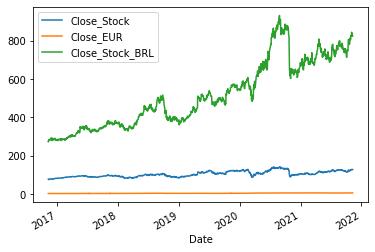

In [11]:
ax = plt.gca()

merged_dataframe.plot(kind='line',y='Close_Stock',ax=ax)
merged_dataframe.plot(kind='line',y='Close_EUR', ax=ax)
merged_dataframe.plot(kind='line',y='Close_Stock_BRL', ax=ax)

plt.show()